In [41]:
import os
os.getcwd()

'/home/user13/user13/IA_2'

In [42]:
# Importing all the necessary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import svm
from sklearn.metrics import accuracy_score
import tensorflow as tf
import seaborn as sns
from tensorflow.keras import layers, models

### 1. Collect images of handwritten letters of one of the Indian languages 

In [43]:
df = pd.read_csv(r'/home/user13/user13/IA_2/Dig-MNIST.csv')
df

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          0       0       0       0       0       0       0       0       0   
1          1       0       0       0       0       0       0       0       0   
2          2       0       0       0       0       0       0       0       0   
3          3       0       0       0       0       0       0       0       0   
4          4       0       0       0       0       0       0       0       0   
5          5       0       0       0       0       0       0       0       0   
6          6       0       0       0       0       0       0       0       0   
7          7       0       0       0       0       0       0       0       0   
8          8       0       0       0       0       0       0       0       0   
9          9       0       0       0       0       0       0       0       0   
10         0       0       0       0       0       0       0       0       0   
11         1       0       0       0       0       0       0       0       0   
12         2       0       0       0       0       0       0       0       0   
13         3       0       0       0       0       0       0       0       0   
14         4       0       0       0       0       0       0       0       0   
15         5       0       0       0       0       0       0       0       0   
16         6       0       0       0       0       0       0       0       0   
17         7       0       0       0       0       0       0       0       0   
18         8       0       0       0       0       0       0       0       0   
19         9       0       0       0       0       0       0       0       0   
20         0       0       0       0       0       0       0       0       0   
21         1       0       0       0       0       0       0       0       0   
22         2       0       0       0       0       0       0       0       0   
23         3       0       0       0       0       0       0       0       0   
24         4       0       0       0       0       0       0       0       0   
25         5       0       0       0       0       0       0       0       0   
26         6       0       0       0       0       0       0       0       0   
27         7       0       0       0       0       0       0       0       0   
28         8       0       0       0       0       0       0       0       0   
29         9       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
10210      0       0       0       0       0       0       0       0       0   
10211      1       0       0       0       0       0       0       0       0   
10212      2       0       0       0       0       0       0       0       0   
10213      3       0       0       0       0       0       0       0       0   
10214      4       0       0       0       0       0       0       0       0   
10215      5       0       0       0       0       0       0       0       0   
10216      6       0       0       0       0       0       0       0       0   
10217      7       0       0       0       0       0       0       0       0   
10218      8       0       0       0       0       0       0       0       0   
10219      9       0       0       0       0       0       0       0       0   
10220      0       0       0       0       0       0       0       0       0   
10221      1       0       0       0       0       0       0       0       0   
10222      2       0       0       0       0       0       0       0       0   
10223      3       0       0       0       0       0       0       0       0   
10224      4       0       0       0       0       0       0       0       0   
10225      5       0       0       0       0       0       0       0       0   
10226      6       0       0       0       0       0       0       0       0   
10227      7       0       0       0       0       0       0       0       0   
10228  

In [44]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 61.3 MB


In [46]:
df.describe()

label   pixel0   pixel1   pixel2        pixel3        pixel4  \
count  10240.000000  10240.0  10240.0  10240.0  10240.000000  10240.000000   
mean       4.500000      0.0      0.0      0.0      0.019629      0.015820   
std        2.872422      0.0      0.0      0.0      1.986306      1.600903   
min        0.000000      0.0      0.0      0.0      0.000000      0.000000   
25%        2.000000      0.0      0.0      0.0      0.000000      0.000000   
50%        4.500000      0.0      0.0      0.0      0.000000      0.000000   
75%        7.000000      0.0      0.0      0.0      0.000000      0.000000   
max        9.000000      0.0      0.0      0.0    201.000000    162.000000   

             pixel5        pixel6        pixel7        pixel8    ...     \
count  10240.000000  10240.000000  10240.000000  10240.000000    ...      
mean       0.045410      0.023047      0.048828      0.032910    ...      
std        2.926116      1.698099      3.494384      2.646949    ...      
min        0.000000      0.000000      0.000000      0.000000    ...      
25%        0.000000      0.000000      0.000000      0.000000    ...      
50%        0.000000      0.000000      0.000000      0.000000    ...      
75%        0.000000      0.000000      0.000000      0.000000    ...      
max      208.000000    147.000000    255.000000    255.000000    ...      

           pixel774      pixel775      pixel776      pixel777      pixel778  \
count  10240.000000  10240.000000  10240.000000  10240.000000  10240.000000   
mean       0.027539      0.049805      0.027441      0.029883      0.103223   
std        2.222074      3.563559      2.397978      2.253815      4.727705   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      220.000000    255.000000    239.000000    204.000000    255.000000   

           pixel779  pixel780      pixel781  pixel782  pixel783  
count  10240.000000   10240.0  10240.000000   10240.0   10240.0  
mean       0.039844       0.0      0.019922       0.0       0.0  
std        2.850847       0.0      2.015952       0.0       0.0  
min        0.000000       0.0      0.000000       0.0       0.0  
25%        0.000000       0.0      0.000000       0.0       0.0  
50%        0.000000       0.0      0.000000       0.0       0.0  
75%        0.000000       0.0      0.000000       0.0       0.0  
max      204.000000       0.0    204.000000       0.0       0.0  

[8 rows x 785 columns]

### 2. Split the data into train and test tests (80% train and 20% test)

In [47]:
X = df.loc[:, df.columns != "label"]
X

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
5           0       0       0       0       0       0       0       0       0   
6           0       0       0       0       0       0       0       0       0   
7           0       0       0       0       0       0       0       0       0   
8           0       0       0       0       0       0       0       0       0   
9           0       0       0       0       0       0       0       0       0   
10          0       0       0       0       0       0       0       0       0   
11          0       0       0       0       0       0       0       0       0   
12          0       0       0       0       0       0       0       0       0   
13          0       0       0       0       0       0       0       0       0   
14          0       0       0       0       0       0       0       0       0   
15          0       0       0       0       0       0       0       0       0   
16          0       0       0       0       0       0       0       0       0   
17          0       0       0       0       0       0       0       0       0   
18          0       0       0       0       0       0       0       0       0   
19          0       0       0       0       0       0       0       0       0   
20          0       0       0       0       0       0       0       0       0   
21          0       0       0       0       0       0       0       0       0   
22          0       0       0       0       0       0       0       0       0   
23          0       0       0       0       0       0       0       0       0   
24          0       0       0       0       0       0       0       0       0   
25          0       0       0       0       0       0       0       0       0   
26          0       0       0       0       0       0       0       0       0   
27          0       0       0       0       0       0       0       0       0   
28          0       0       0       0       0       0       0       0       0   
29          0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
10210       0       0       0       0       0       0       0       0       0   
10211       0       0       0       0       0       0       0       0       0   
10212       0       0       0       0       0       0       0       0       0   
10213       0       0       0       0       0       0       0       0       0   
10214       0       0       0       0       0       0       0       0       0   
10215       0       0       0       0       0       0       0       0       0   
10216       0       0       0       0       0       0       0       0       0   
10217       0       0       0       0       0       0       0       0       0   
10218       0       0       0       0       0       0       0       0       0   
10219       0       0       0       0       0       0       0       0       0   
10220       0       0       0       0       0       0       0       0       0   
10221       0       0       0       0       0       0       0       0       0   
10222       0       0       0       0       0       0       0       0       0   
10223       0       0       0       0       0       0       0       0       0   
10224       0       0       0       0       0       0       0       0       0   
10225       0       0       0       0       0       0       0       0       0   
10226       0       0       0       0       0       0       0       0       0   
10227       0       0       0       0 

In [48]:
y = df["label"]
y

0        0
1        1
2        2
3        3
4        4
5        5
6        6
7        7
8        8
9        9
10       0
11       1
12       2
13       3
14       4
15       5
16       6
17       7
18       8
19       9
20       0
21       1
22       2
23       3
24       4
25       5
26       6
27       7
28       8
29       9
        ..
10210    0
10211    1
10212    2
10213    3
10214    4
10215    5
10216    6
10217    7
10218    8
10219    9
10220    0
10221    1
10222    2
10223    3
10224    4
10225    5
10226    6
10227    7
10228    8
10229    9
10230    0
10231    1
10232    2
10233    3
10234    4
10235    5
10236    6
10237    7
10238    8
10239    9
Name: label, Length: 10240, dtype: int64

In [49]:
## Standardizing the data
standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)

(10240, 784)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

In [51]:
X_train.shape

(8192, 784)

In [52]:
X_test.shape

(2048, 784)

In [53]:
y_train.shape

(8192,)

In [54]:
y_test.shape

(2048,)

### 3. Use dimension reduction techniques, PCA and t-SNE to reduce the dimensions of the data

In [55]:
# Applying PCA

pca = PCA(n_components=2) # project from 784 to 2 dimensions
principalComponents = pca.fit_transform(X)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principal_df.shape

(10240, 2)

In [56]:
# Explaining the Variance ratio
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.07556024 0.04945092]


Text(0,0.5,'Principal Component 2')

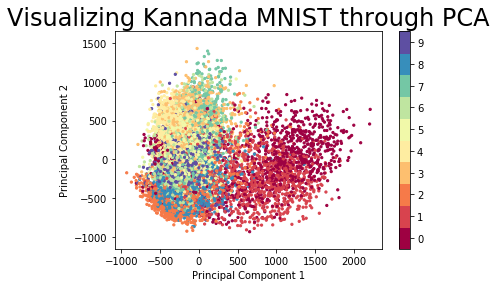

In [57]:
# Plot the first two principal components of each point to learn about the data:

plt.scatter(principalComponents[:, 0], principalComponents[:, 1], s= 5, c=y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through PCA', fontsize=24)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [58]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

Text(0,0.5,'cumulative explained variance')

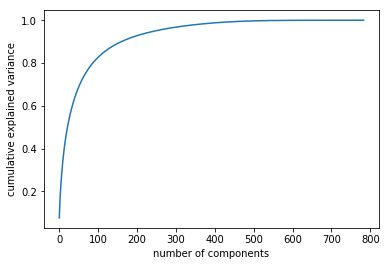

In [59]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [60]:
# Applyting t-SNE on the data
%time
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(X)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


Text(0.5,1,'Visualizing Kannada MNIST through t-SNE')

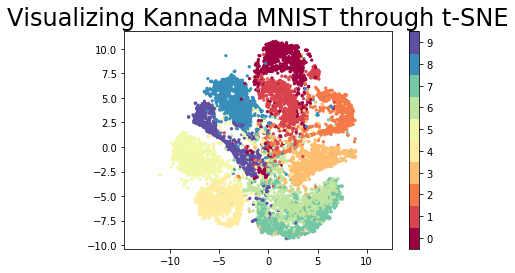

In [61]:
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through t-SNE', fontsize=24)

### 4. Train and Validate classification model using neural networks and support vector machines on the training data

In [62]:
# 4.1 --> Support Vector Machines --> Accuracy:- 92%

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [ ]:
## 4.1 Hyper Parameter tuning --> Support Vector Machines --> Accuracy is decreased

# clf = svm.SVC(C=1.0, kernel="poly", degree=5, gamma="auto", random_state=102)
# clf.fit(X_train, y_train)

In [63]:
y_pred = clf.predict(X_test)

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy(%) of the SVM is: ", accuracy * 100)

Accuracy(%) of the SVM is:  92.3828125


In [65]:
# 4.2 --> classification model using CNN --> Accuracy 89%

# Normalizing the data
X_train = X_train / 255.0

# One-Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10, dtype="uint8")
# 0 --> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [66]:
# Whatever the size of the matrix is we reshape it to 28 X 28 matrix
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [67]:
X_train.shape

(8192, 28, 28, 1)

In [68]:
X_test.shape

(2048, 28, 28, 1)

In [69]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation = "relu", input_shape = (28, 28, 1)))
model.add(layers.Conv2D(32, (5, 5), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (5, 5), activation = "relu"))
model.add(layers.Conv2D(64, (5, 5), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation = "softmax"))

In [ ]:
## Hyper-Parameter tuning CNN Model --> Accuracy is decreased

# model = models.Sequential()
# model.add(layers.Conv2D(32, (5, 5), activation = layers.LeakyReLU(), input_shape = (28, 28, 1)))
# model.add(layers.Conv2D(32, (5, 5), activation = layers.LeakyReLU()))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.25))

# model.add(layers.Conv2D(64, (5, 5), activation = layers.LeakyReLU()))
# model.add(layers.Conv2D(64, (5, 5), activation = layers.LeakyReLU()))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.25))

# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation = layers.LeakyReLU()))
# model.add(layers.Dropout(0.25))
# model.add(layers.Dense(10, activation = tf.nn.tanh))

In [70]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [71]:
X_train.shape

(8192, 28, 28, 1)

In [72]:
y_train.shape

(8192, 10)

In [73]:
model.fit(X_train, y_train, batch_size=1000, epochs=10, verbose=2)

Epoch 1/10
9/9 - 25s - loss: 2.1952 - accuracy: 0.2203
Epoch 2/10
9/9 - 28s - loss: 1.4704 - accuracy: 0.4950
Epoch 3/10
9/9 - 28s - loss: 1.0420 - accuracy: 0.6709
Epoch 4/10
9/9 - 28s - loss: 0.8069 - accuracy: 0.7533
Epoch 5/10
9/9 - 28s - loss: 0.6685 - accuracy: 0.7972
Epoch 6/10
9/9 - 29s - loss: 0.5672 - accuracy: 0.8275
Epoch 7/10
9/9 - 26s - loss: 0.4842 - accuracy: 0.8501
Epoch 8/10
9/9 - 27s - loss: 0.4306 - accuracy: 0.8644
Epoch 9/10
9/9 - 27s - loss: 0.3811 - accuracy: 0.8835
Epoch 10/10
9/9 - 23s - loss: 0.3608 - accuracy: 0.8871


In [74]:
# Predicting the model on the test data

y_pred_NN = model.predict(X_test)

In [77]:
# # Getting the first predictions
y_pred_NN[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [79]:
max_index = 0
for i in range(0, len(y_pred_NN[0])):
    if y_pred_NN[0][i] > y_pred_NN[0][max_index]:
        max_index = 1

print("Predicted Value : ", max_index)

Predicted Value :  1
